In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from swiftascmaps import red
from matplotlib.pyplot import imshow
from numpy import random

# download nltk corpus (first time only)
#nltk.download('all')


# Debut 🩵🤍💙

In [174]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/01-taylor_swift.csv')
df.head()

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5


In [175]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,album_name,object,0,0.000000
1,track_title,object,0,0.000000
2,track_n,int64,0,0.000000
3,lyric,object,0,0.000000
4,line,int64,0,0.000000


In [176]:
df.columns

Index(['album_name', 'track_title', 'track_n', 'lyric', 'line'], dtype='object')

In [177]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

album_name: 1 distinct values
track_title: 15 distinct values
track_n: 15 distinct values
lyric: 402 distinct values
line: 55 distinct values


In [178]:
df['track_title'].value_counts()

Tim McGraw                              55
Stay Beautiful                          55
Our Song                                51
Picture To Burn                         50
Invisible                               48
Should've Said No                       44
Teardrops on My Guitar (Pop Version)    44
I’m Only Me When I’m with You           43
Tied Together With A Smile              38
Mary’s Song (Oh My My My)               38
Teardrops On My Guitar                  35
The Outside                             35
A Place In This World                   27
A Perfectly Good Heart                  24
Cold As You                             22
Name: track_title, dtype: int64

In [179]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['lyric', 'Vader_Score', 'Sentiment']].head())

                                         lyric  Vader_Score Sentiment
0          He said the way my blue eyes shined       0.0000   neutral
1  Put those Georgia stars to shame that night      -0.4767  negative
2                       I said, "That's a lie"       0.0000   neutral
3                  Just a boy in a Chevy truck       0.0000   neutral
4         That had a tendency of gettin' stuck      -0.2500  negative


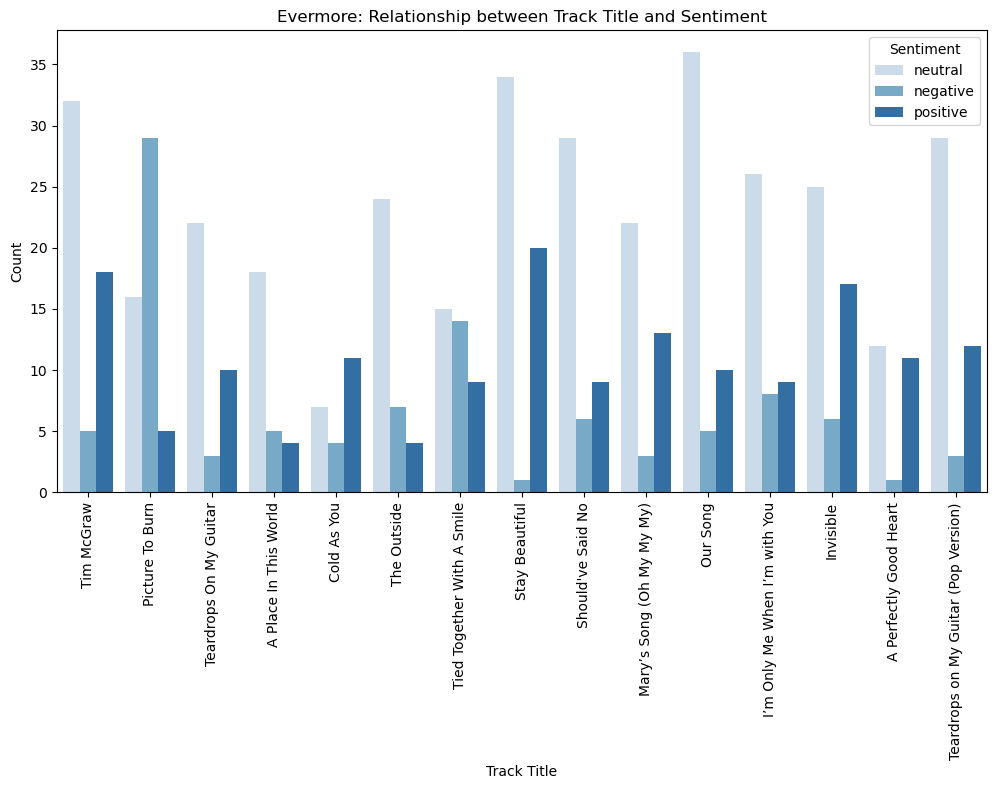

In [180]:
plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='Blues')
plt.title('Evermore: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [181]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\s+', ' ', text.strip()) #r 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^\x00-\x7F]+', '', text)  #text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["clean_lyrics"] = df["lyric"].apply(clean)

In [182]:
from collections import Counter

df['temp_list'] = df['clean_lyrics'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,common_words,count
0,im,43
1,know,42
2,oh,38
3,your,38
4,na,38
5,dont,33
6,think,31
7,he,27
8,back,26
9,never,26


In [183]:
top = Counter([item for sublist in df[df['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['positive_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,positive_words,count
0,beauti,20
1,love,18
2,like,15
3,hope,14
4,think,12
5,wish,11
6,smile,11
7,would,11
8,wan,11
9,na,11


In [184]:
top = Counter([item for sublist in df[df['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['negative_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,negative_words,count
0,know,10
1,your,9
2,time,9
3,cri,7
4,im,6
5,realli,6
6,see,6
7,alon,6
8,dont,6
9,one,6


# Fearless 🧡🤎💛

In [185]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/02-fearless_taylors_version.csv')
df['track_title'].value_counts()

Jump Then Fall (Taylor’s Version)                         58
Today Was a Fairytale (Taylor’s Version)                  58
Forever & Always (Piano Version) [Taylor’s Version]       58
Mr. Perfectly Fine (Taylor’s Version) [From the Vault]    57
Hey Stephen (Taylor’s Version)                            54
Forever & Always (Taylor’s Version)                       53
The Way I Loved You (Taylor’s Version)                    50
Fifteen (Taylor’s Version)                                50
You Belong With Me (Taylor’s Version)                     49
Love Story (Taylor’s Version)                             48
That’s When (Taylor’s Version) [From the Vault]           48
The Other Side of the Door (Taylor’s Version)             47
Tell Me Why (Taylor’s Version)                            46
Untouchable (Taylor’s Version)                            45
Bye Bye Baby (Taylor’s Version) [From the Vault]          45
You’re Not Sorry (Taylor’s Version)                       44
White Horse (Taylor’s Ve

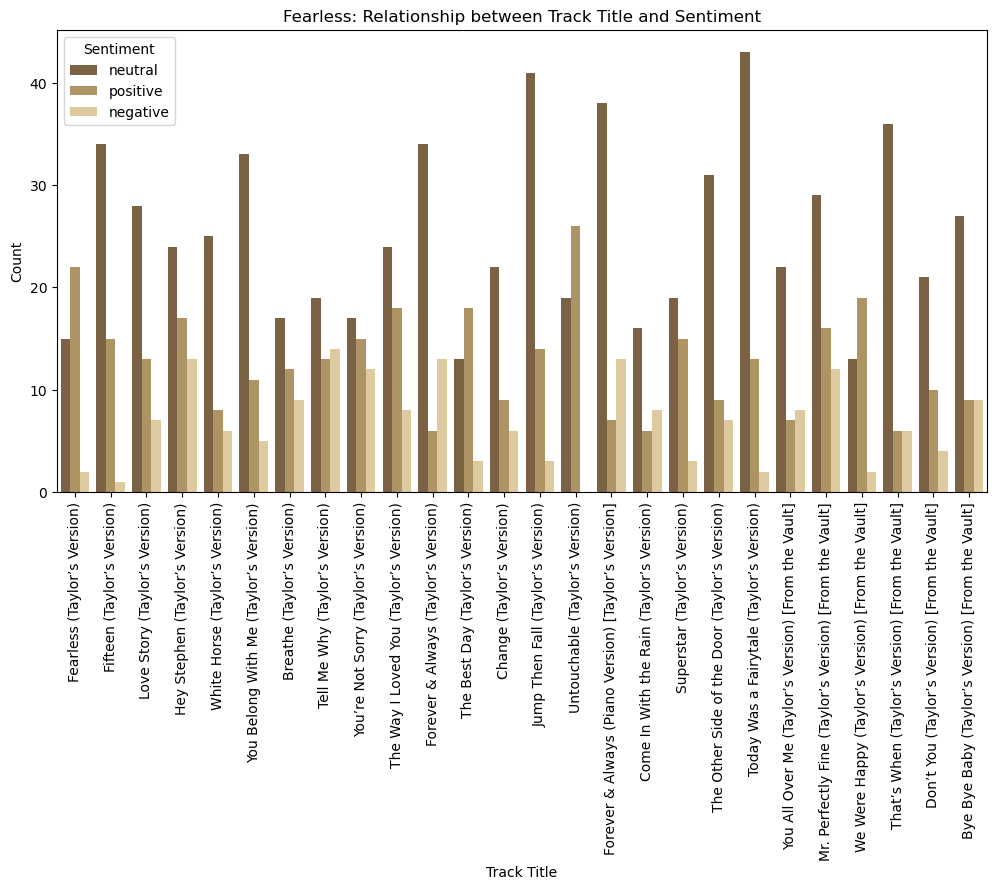

In [186]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.fearless_tv')
plt.title('Fearless: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Speak Now 💜

In [187]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/03-speak_now_deluxe_package.csv')
df['track_title'].value_counts()

Enchanted              82
Speak Now              71
Long Live              63
Better Than Revenge    59
Last Kiss              59
The Story of Us        58
Mean                   56
Superman               55
Dear John              53
Never Grow Up          52
Haunted                51
Back to December       50
If This Was a Movie    50
Mine                   50
Sparks Fly             49
Innocent               46
Ours                   41
Name: track_title, dtype: int64

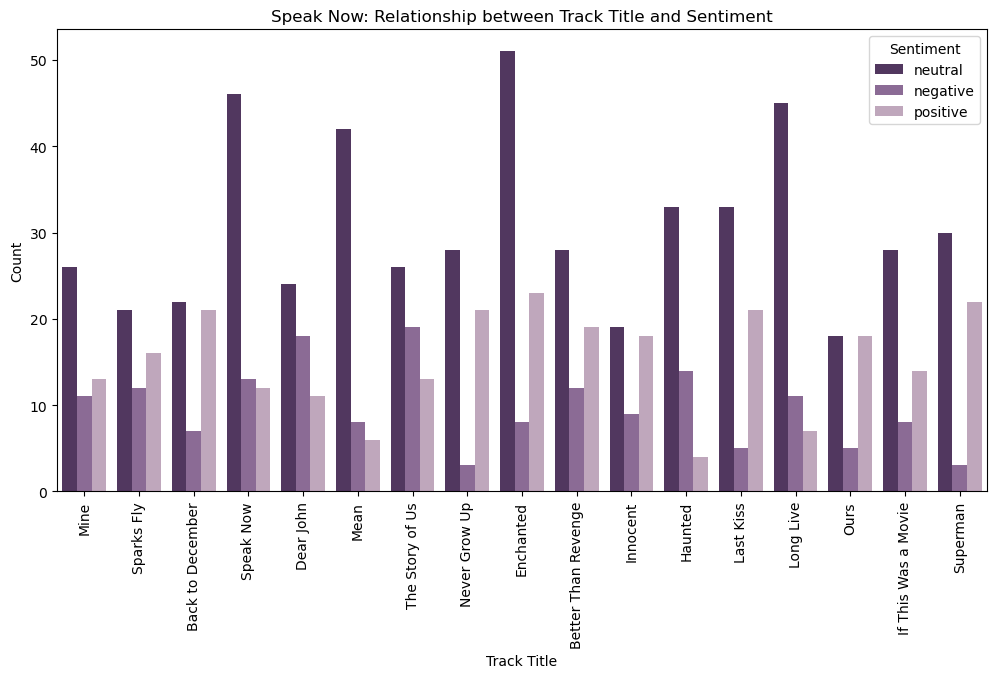

In [188]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.speak_now_tv')
plt.title('Speak Now: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# RED ❤️

In [189]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/04-red_deluxe_edition.csv')
df['track_title'].value_counts()

Everything Has Changed                     65
22                                         63
The Moment I Knew                          62
I Knew You Were Trouble                    61
The Last Time                              58
All Too Well                               58
Girl at Home                               56
Red                                        55
We Are Never Ever Getting Back Together    53
Treacherous (Original Demo Recording)      51
Starlight                                  48
State of Grace                             48
Treacherous                                47
Come Back... Be Here                       46
Holy Ground                                45
Red (Original Demo Recording)              42
Stay Stay Stay                             41
The Lucky One                              39
State of Grace (Acoustic Version)          36
I Almost Do                                36
Begin Again                                35
Sad Beautiful Tragic              

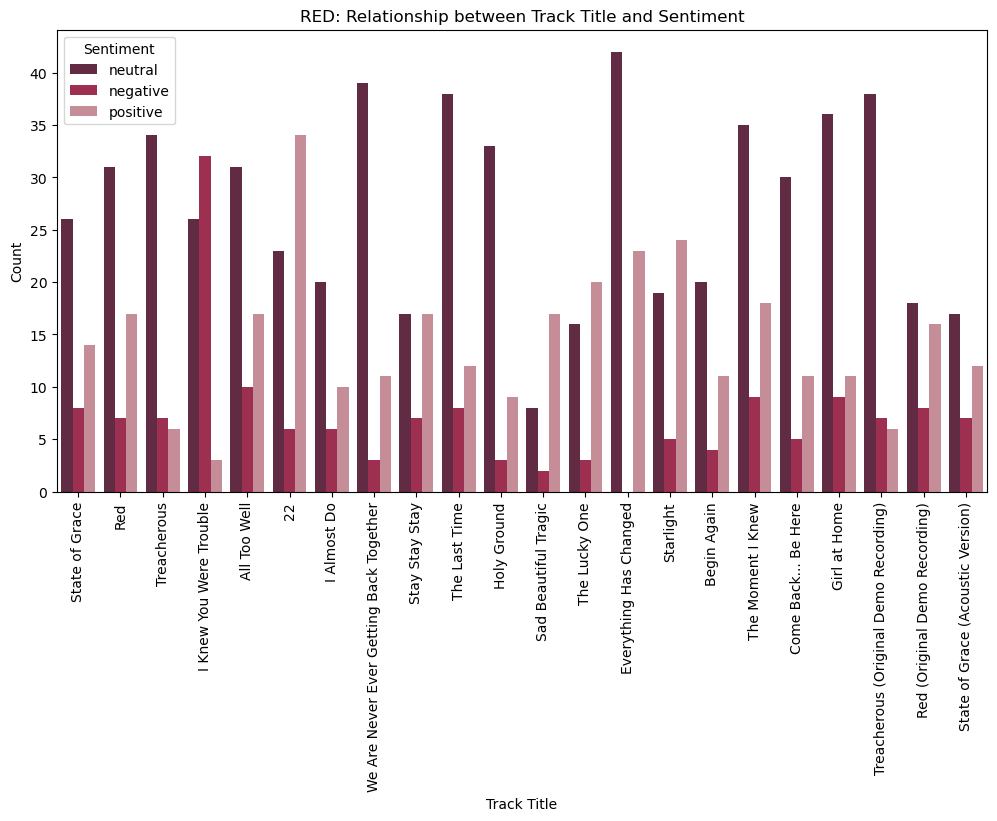

In [190]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.red')
plt.title('RED: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [191]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

df["clean_lyrics"] = df["lyric"].apply(clean)

In [192]:
from collections import Counter
df['temp_list'] = df['clean_lyrics'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['common_words', 'count']
top_words_df.style.background_gradient(cmap='swift.red')

SyntaxError: '(' was never closed (2756744040.py, line 4)

# 1989 💜🤎🧡

In [ ]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/05-1989_deluxe.csv')
df['track_title'].value_counts()

,album_name,track_title,track_n,lyric,line
0,1989 (Deluxe),Welcome to New York,1,"Walking through a crowd, the village is aglow",1
1,1989 (Deluxe),Welcome to New York,1,Kaleidoscope of loud heartbeats under coats,2
2,1989 (Deluxe),Welcome to New York,1,Everybody here wanted something more,3
3,1989 (Deluxe),Welcome to New York,1,Searching for a sound we hadn't heard before,4
4,1989 (Deluxe),Welcome to New York,1,And it said,5


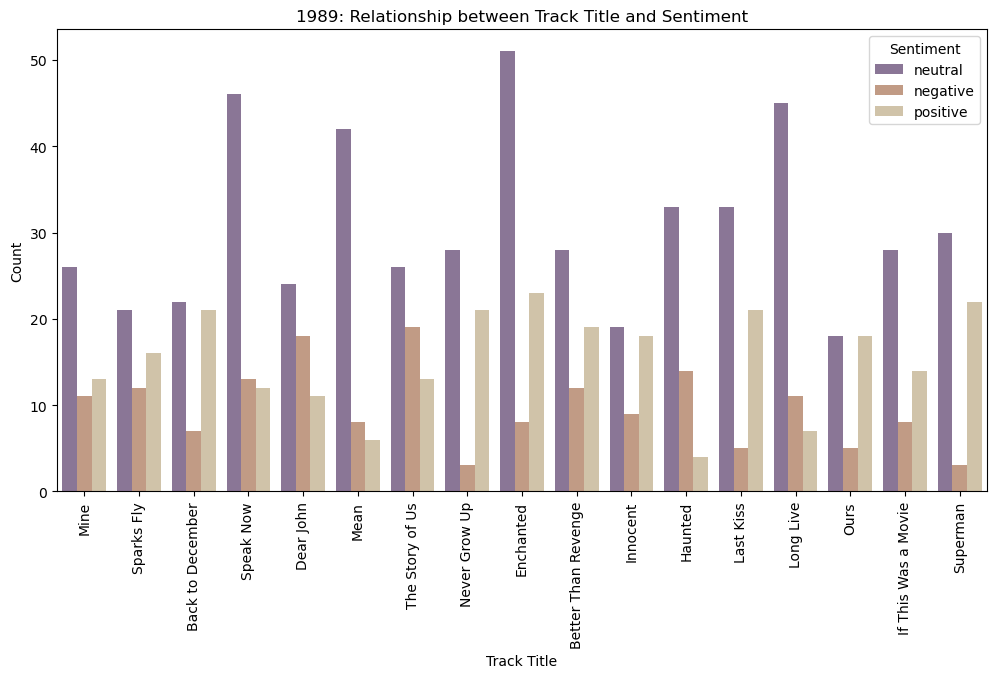

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.nineteen_eighty_nine')
plt.title('1989: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Reputation 🖤🤍🩶

In [ ]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/06-reputation.csv')
df['track_title'].value_counts()

,album_name,track_title,track_n,lyric,line
0,reputation,...Ready for It?,1,Knew he was a killer first time that I saw him,1
1,reputation,...Ready for It?,1,Wondered how many girls he had loved and left ...,2
2,reputation,...Ready for It?,1,"But if he's a ghost, then I can be a phantom",3
3,reputation,...Ready for It?,1,"Holdin' him for ransom, some",4
4,reputation,...Ready for It?,1,"Some boys are tryin' too hard, he don't try at...",5


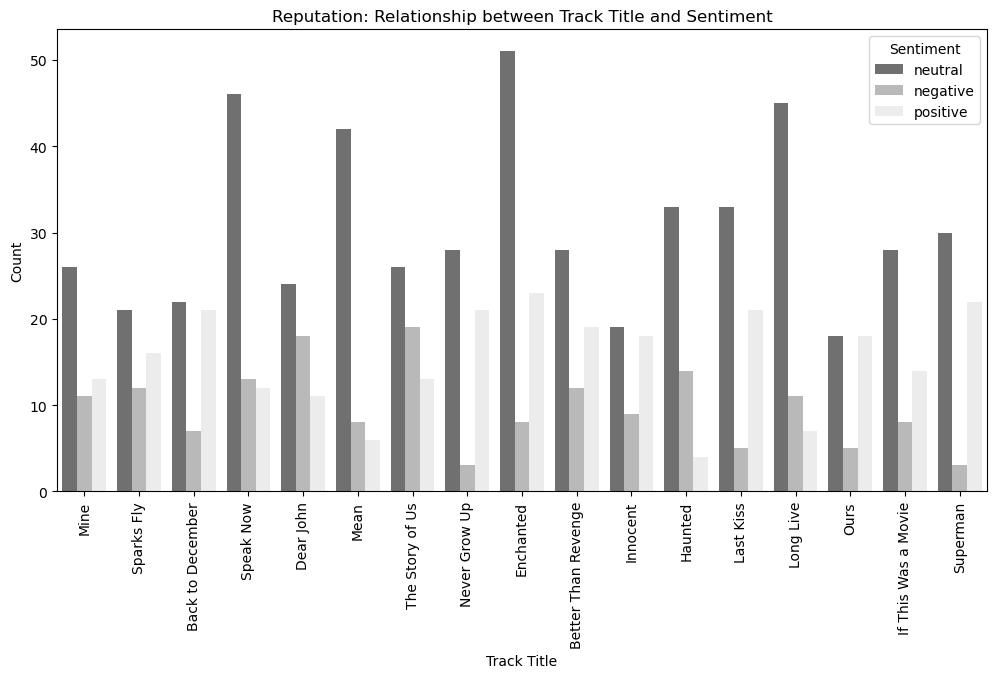

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.reputation')
plt.title('Reputation: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Lover 🩷🤍💜

In [ ]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/07-lover.csv')
df['track_title'].value_counts()

,album_name,track_title,track_n,lyric,line
0,Lover,I Forgot That You Existed,1,How many days did I spend thinking,1
1,Lover,I Forgot That You Existed,1,"'Bout how you did me wrong, wrong, wrong?",2
2,Lover,I Forgot That You Existed,1,Lived in the shade you were throwing,3
3,Lover,I Forgot That You Existed,1,"'Til all of my sunshine was gone, gone, gone",4
4,Lover,I Forgot That You Existed,1,And I couldn't get away from ya,5


In [ ]:
df[df['track_title'] == 'I Think He Knows']

,album_name,track_title,track_n,lyric,line
234,Lover,I Think He Knows,6,I think he knows,1
235,Lover,I Think He Knows,6,His footprints on the sidewalk,2
236,Lover,I Think He Knows,6,Lead to where I can't stop,3
237,Lover,I Think He Knows,6,Go there every night,4
238,Lover,I Think He Knows,6,I think he knows,5
...,...,...,...,...,...
295,Lover,I Think He Knows,6,"I want you, bless my soul (He got my heartbeat)",62
296,Lover,I Think He Knows,6,"I want you, bless my (Skipping down 16th Avenu...",63
297,Lover,I Think He Knows,6,"I want you, bless my",64
298,Lover,I Think He Knows,6,"I want you, bless my soul",65


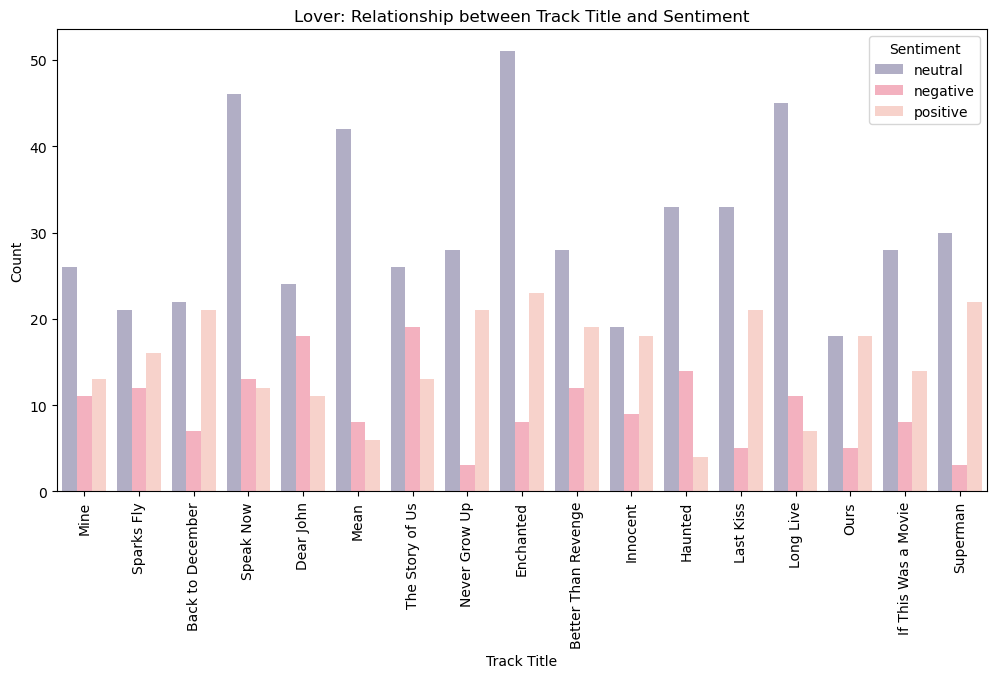

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.lover')
plt.title('Lover: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["clean_lyrics"] = df["lyric"].apply(clean)

In [ ]:
from collections import Counter
df['temp_list'] = df['clean_lyrics'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['common_words', 'count'])
top_words_df.style.background_gradient(cmap='swift.lover')

In [ ]:
top = Counter([item for sublist in df[df['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['positive_common_words', 'count'])
temp_positive.style.background_gradient(cmap='swift.lover')

# Folklore 🩶💚🖤

In [ ]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/08-folklore_deluxe_version.csv')
df['track_title'].value_counts()

​betty                              67
​exile                              61
cardigan                            56
​invisible string                   54
august                              51
the 1                               47
​mad woman                          45
​the last great american dynasty    40
​mirrorball                         39
hoax                                38
my tears ricochet                   37
seven                               37
​illicit affairs                    36
​peace                              33
this is me trying                   29
​the lakes                          28
​epiphany                           24
Name: track_title, dtype: int64

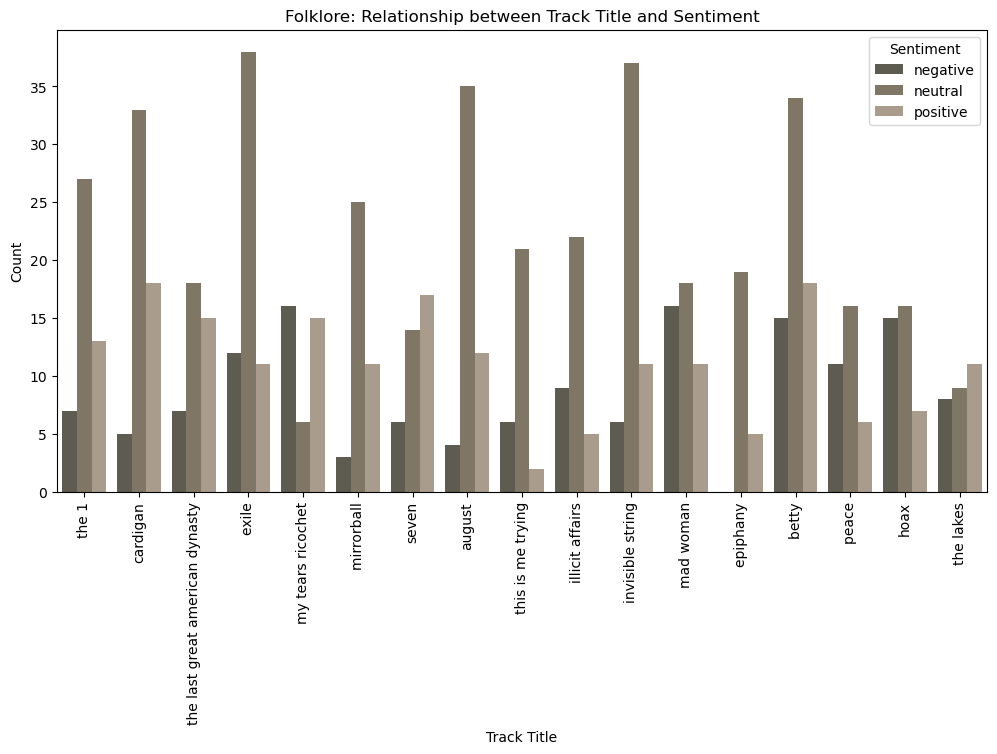

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.folklore')
plt.title('Folklore: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Evermore 🤎🧡🖤

In [ ]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/09-evermore_deluxe_version.csv')
df['track_title'].value_counts()

​l​ong story short           69
​ivy                         64
​happiness                   64
​coney island                61
​r​ight where you left me    60
​evermore                    60
cowboy like me               60
​marjorie                    56
willow                       55
​it’s time to go             54
​’tis the damn season        52
champagne problems           51
​no body, no crime           51
​gold rush                   42
​tolerate it                 41
​closure                     39
​dorothea                    33
Name: track_title, dtype: int64

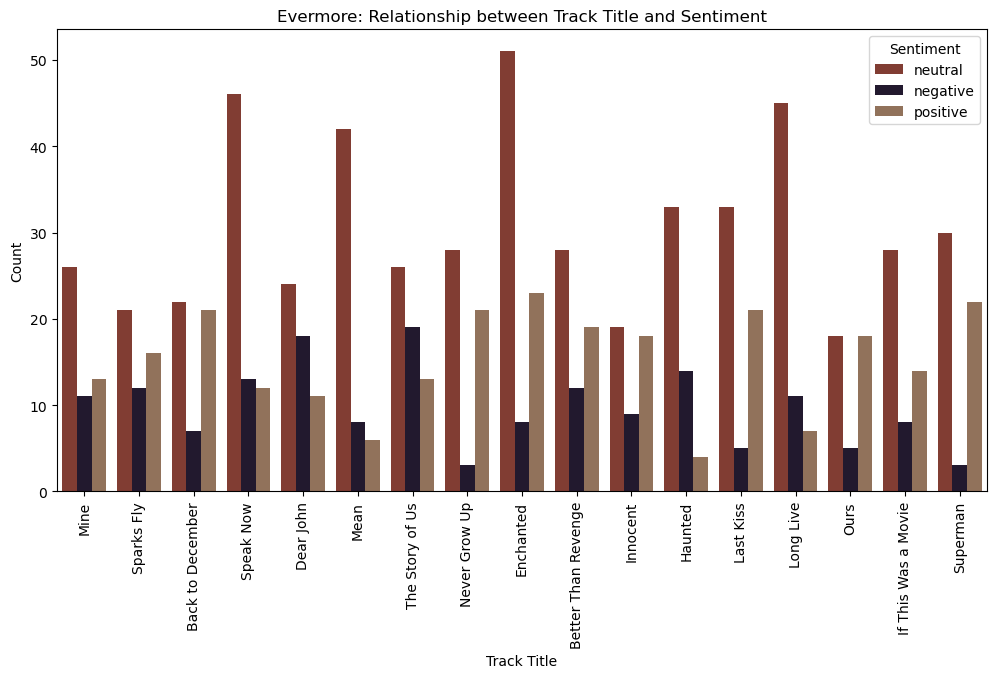

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.evermore')
plt.title('Evermore: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# colors = ['#cc621b', '#c2dfff', '#38a3a5']
# explode = (0.1, 0, 0)  
# sentiment_counts = df.groupby("Sentiment").size()
# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(
#     x=sentiment_counts, 
#     labels=sentiment_counts.index,
#     autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
#     wedgeprops=dict(width=0.7),
#     textprops=dict(size=10, color="b"),  
#     pctdistance=0.7,
#     colors=colors,
#     explode=explode,
#     shadow=True)
# center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
# fig.gca().add_artist(center_circle)
# ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')
# ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
# ax.axis('equal')  
# plt.show()